# Project: Wrangling and Analyze Data

# Table of Content

  * [Introduction](#Introduction)
  
  * [Data Wrangling](#Data_Wrangling)

   * [Data Gathering](#Data_Gathering)
  
   * [Assessing Data](#Assessing_Data)
  
   * [Cleaning Data](#Cleaning_Data)
  
   * [Storing Data](#Storing_Data)
   
* [Analyzing and Visualizing Data](#Analyzing_and_Visualizing_Data)



# Introduction

In this project we are going to collect data from different source about rating of dogs. The main source being twitter acount which is used in the rating of dogs called [WeRateDogs]('https://twitter.com/dog_rates'). The other sources of information used in this project is available on Udacity. The link for downloading twitter_archive_enhanced data set is [Download]('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'). The data about images-predications can be accessed by programmatic downloading the folowing data [url]('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv') by using request package.


# Data_Wrangling
Data Wrangling is grouped into three stages, which include:
1. Data Gathering
2. Data Assessing
3. Data Cleaning

## Data_Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

**Importing Libraries to be use**

In [2]:
import pandas as pd
import requests as rt
import os
import tweepy
import json
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import time


In [3]:
#reading the downloaded csv file
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#Using request to download the url
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = rt.get(url)

In [5]:
#saving the downloaded tsv file
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [6]:
#reading the downloaded file
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

  3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
#running the keys from keys notebook were I saved them
%run ./keys.ipynb

In [8]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
tweet_ids = twitter_archive_enhanced.tweet_id.values
len(tweet_ids)

2356

In [10]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = time.time()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print('False')
            fails_dict[tweet_id] = e
            pass
        
end = time.time()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
False
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 886054160059072

False
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
29

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
False
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
80

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [11]:
#opening json file 
df_list = []

with open('tweet_json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [12]:
#reading json file data
columns = ['id' , 'retweet_count' , 'favorite_count']
tweet_data = pd.DataFrame(df_list , columns = columns)

## Assessing_Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



Visual Assessment of the data

In [13]:
# Display the thitter_archive_enhanced table
twitter_archive_enhanced

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [14]:
# Display the image_predictions table
image_predictions

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [15]:
# Display the tweet_data table
tweet_data

id  retweet_count  favorite_count
0     892420643555336193           6970           33696
1     892177421306343426           5272           29223
2     891815181378084864           3464           21978
3     891689557279858688           7191           36791
4     891327558926688256           7717           35183
...                  ...            ...             ...
2322  666049248165822465             36              88
2323  666044226329800704            115             246
2324  666033412701032449             36             100
2325  666029285002620928             39             112
2326  666020888022790149            419            2283

[2327 rows x 3 columns]

In [16]:
#Displaying the colums in twitter_archive_enhanced
twitter_archive_enhanced.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [17]:
#Displaying the columns inimage_predictions
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [18]:
#Displaying the columns in tweer_data
tweet_data.columns

Index(['id', 'retweet_count', 'favorite_count'], dtype='object')

In [19]:
#Displaying the first five rows using head function
twitter_archive_enhanced.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [20]:
#Displaying the first five rows using head function
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [21]:
#Displaying the first five rows using head function
tweet_data.head()

id  retweet_count  favorite_count
0  892420643555336193           6970           33696
1  892177421306343426           5272           29223
2  891815181378084864           3464           21978
3  891689557279858688           7191           36791
4  891327558926688256           7717           35183

In [22]:
#Displaying the last five rows using tail function
twitter_archive_enhanced.tail()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  name doggo floofer pupper puppo  
2351                  10  None  None    None   None  None  
2352                  10     a  None    None   None  None  
2353                  10     a  None    None   None  None  
2354                  10     a  None    None   None  None  
2355                  10  None  None    None   None  None

In [23]:
#Displaying the last five rows using tail function
image_predictions.tail()

tweet_id                                          jpg_url  \
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num           p1   p1_conf  p1_dog                  p2   p2_conf  \
2070        2       basset  0.555712    True    English_springer  0.225770   
2071        1  paper_towel  0.170278   False  Labrador_retriever  0.168086   
2072        1    Chihuahua  0.716012    True            malamute  0.078253   
2073        1    Chihuahua  0.323581    True            Pekinese  0.090647   
2074        1       orange  0.097049   False               bagel  0.085851   

      p2_dog                           p3   p3_conf  p3_dog  
2070    True  German_short-haired_pointer  0.175219    True  
2071    True                      spatula  0.040836   False  
2072    True                       kelpie  0.031379    True  
2073    True                     papillon  0.068957    True  
2074   False                       banana  0.076110   False

In [24]:
#Displaying the last five rows using tail function
tweet_data.tail()

id  retweet_count  favorite_count
2322  666049248165822465             36              88
2323  666044226329800704            115             246
2324  666033412701032449             36             100
2325  666029285002620928             39             112
2326  666020888022790149            419            2283

In [25]:
#Displaying the content of text in 19th to 71st rows
twitter_archive_enhanced['text'][18:70]

18    This is Ralphus. He's powering up. Attempting ...
19    RT @dog_rates: This is Canela. She attempted s...
20    This is Gerald. He was just told he didn't get...
21    This is Jeffrey. He has a monopoly on the pool...
22    I've yet to rate a Venezuelan Hover Wiener. Th...
23    This is Canela. She attempted some fancy porch...
24    You may not have known you needed to see this ...
25    This... is a Jubilant Antarctic House Bear. We...
26    This is Maya. She's very shy. Rarely leaves he...
27    This is Mingus. He's a wonderful father to his...
28    This is Derek. He's late for a dog meeting. 13...
29    This is Roscoe. Another pupper fallen victim t...
30    @NonWhiteHat @MayhewMayhem omg hello tanner yo...
31    This is Waffles. His doggles are pupside down....
32    RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...
33    Viewer discretion advised. This is Jimbo. He w...
34    This is Maisey. She fell asleep mid-excavation...
35    I have a new hero and his name is Howard. 

In [26]:
#Displaying the information summary
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [27]:
#Displaying the information summary
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
#Displaying the information summary
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [29]:
#Checking for the missing values
twitter_archive_enhanced.isna()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  timestamp  source  \
0        False                   True                 True      False   False   
1        False                   True                 True      False   False   
2        False                   True                 True      False   False   
3        False                   True                 True      False   False   
4        False                   True                 True      False   False   
...        ...                    ...                  ...        ...     ...   
2351     False                   True                 True      False   False   
2352     False                   True                 True      False   False   
2353     False                   True                 True      False   False   
2354     False                   True                 True      False   False   
2355     False                   True                 True      False   False   

       text  retweeted_status_id  retweeted_status_user_id  \
0     False                 True                      True   
1     False                 True                      True   
2     False                 True                      True   
3     False                 True                      True   
4     False                 True                      True   
...     ...                  ...                       ...   
2351  False                 True                      True   
2352  False                 True                      True   
2353  False                 True                      True   
2354  False                 True                      True   
2355  False                 True                      True   

      retweeted_status_timestamp  expanded_urls  rating_numerator  \
0                           True          False             False   
1                           True          False             False   
2                           True          False             False   
3                           True          False             False   
4                           True          False             False   
...                          ...            ...               ...   
2351                        True          False             False   
2352                        True          False             False   
2353                        True          False             False   
2354                        True          False             False   
2355                        True          False             False   

      rating_denominator   name  doggo  floofer  pupper  puppo  
0                  False  False  False    False   False  False  
1                  False  False  False    False   False  False  
2                  False  False  False    False   False  False  
3                  False  False  False    False   False  False  
4                  False  False  False    False   False  False  
...                  ...    ...    ...      ...     ...    ...  
2351               False  False  False    False   False  False  
2352               False  False  False    False   False  False  
2353               False  False  False    False   False  False  
2354               False  False  False    False   False  False  
2355               False  False  False    False   False  False  

[2356 rows x 17 columns]

In [30]:
#Checking for the missing values
image_predictions.isna()

tweet_id  jpg_url  img_num     p1  p1_conf  p1_dog     p2  p2_conf  \
0        False    False    False  False    False   False  False    False   
1        False    False    False  False    False   False  False    False   
2        False    False    False  False    False   False  False    False   
3        False    False    False  False    False   False  False    False   
4        False    False    False  False    False   False  False    False   
...        ...      ...      ...    ...      ...     ...    ...      ...   
2070     False    False    False  False    False   False  False    False   
2071     False    False    False  False    False   False  False    False   
2072     False    False    False  False    False   False  False    False   
2073     False    False    False  False    False   False  False    False   
2074     False    False    False  False    False   False  False    False   

      p2_dog     p3  p3_conf  p3_dog  
0      False  False    False   False  
1      False  False    False   False  
2      False  False    False   False  
3      False  False    False   False  
4      False  False    False   False  
...      ...    ...      ...     ...  
2070   False  False    False   False  
2071   False  False    False   False  
2072   False  False    False   False  
2073   False  False    False   False  
2074   False  False    False   False  

[2075 rows x 12 columns]

In [31]:
#Checking for the missing values
tweet_data.isna()

id  retweet_count  favorite_count
0     False          False           False
1     False          False           False
2     False          False           False
3     False          False           False
4     False          False           False
...     ...            ...             ...
2322  False          False           False
2323  False          False           False
2324  False          False           False
2325  False          False           False
2326  False          False           False

[2327 rows x 3 columns]

In [32]:
#Displaying sample of 15 rows randomly
twitter_archive_enhanced.sample(15)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
998   748307329658011649                    NaN                  NaN   
546   805823200554876929                    NaN                  NaN   
2127  670319130621435904                    NaN                  NaN   
1795  677314812125323265                    NaN                  NaN   
1778  677895101218201600                    NaN                  NaN   
619   796149749086875649                    NaN                  NaN   
1830  676219687039057920                    NaN                  NaN   
1349  704134088924532736                    NaN                  NaN   
1599  686034024800862208                    NaN                  NaN   
1920  674265582246694913                    NaN                  NaN   
2301  667044094246576128                    NaN                  NaN   
1429  697596423848730625                    NaN                  NaN   
460   817777686764523521                    NaN                  NaN   
1557  688804835492233216                    NaN                  NaN   
363   829374341691346946                    NaN                  NaN   

                      timestamp  \
998   2016-06-30 00:09:04 +0000   
546   2016-12-05 17:16:37 +0000   
2127  2015-11-27 19:11:49 +0000   
1795  2015-12-17 02:30:09 +0000   
1778  2015-12-18 16:56:01 +0000   
619   2016-11-09 00:37:46 +0000   
1830  2015-12-14 01:58:31 +0000   
1349  2016-02-29 02:40:23 +0000   
1599  2016-01-10 03:57:12 +0000   
1920  2015-12-08 16:33:36 +0000   
2301  2015-11-18 18:17:59 +0000   
1429  2016-02-11 01:42:02 +0000   
460   2017-01-07 16:59:28 +0000   
1557  2016-01-17 19:27:24 +0000   
363   2017-02-08 17:00:26 +0000   

                                                 source  \
998   <a href="http://twitter.com/download/iphone" r...   
546   <a href="http://twitter.com/download/iphone" r...   
2127  <a href="http://twitter.com/download/iphone" r...   
1795  <a href="http://twitter.com/download/iphone" r...   
1778  <a href="http://twitter.com/download/iphone" r...   
619   <a href="http://twitter.com/download/iphone" r...   
1830  <a href="http://twitter.com/download/iphone" r...   
1349  <a href="http://vine.co" rel="nofollow">Vine -...   
1599  <a href="http://twitter.com/download/iphone" r...   
1920  <a href="http://twitter.com/download/iphone" r...   
2301  <a href="http://twitter.com/download/iphone" r...   
1429  <a href="http://twitter.com/download/iphone" r...   
460   <a href="http://twitter.com/download/iphone" r...   
1557  <a href="http://twitter.com/download/iphone" r...   
363   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
998   This sherk must've leapt out of the water and ...                  NaN   
546   RT @dog_rates: This is Reginald. He's one magi...         7.841832e+17   
2127  AT DAWN...\nWE RIDE\n\n11/10 https://t.co/QnfO...                  NaN   
1795  Meet Tassy &amp; Bee. Tassy is pretty chill, b...                  NaN   
1778  Guys this was terrifying. Really spooked me up...                  NaN   
619   This is Ruby. She just turned on the news. Off...                  NaN   
1830  This is Kenneth. He's stuck in a bubble. 10/10...                  NaN   
1349  This sneezy pupper is just adorable af. 12/10 ...                  NaN   
1599  Your fav crew is back and this time they're em...                  NaN   
1920  This is Henry. He's a shit dog. Short pointy e...                  NaN   
2301            12/10 gimme now https://t.co/QZAnwgnOMB                  NaN   
1429  Here's a pupper with a piece of pizza. Two of ...                  NaN   
460   This is Dido. She's playing the lead role in "...                  NaN   
1557  When you stumble but recover quickly cause you...                  NaN   
363   This is Astrid. She's a guide doggo in trainin...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
998            

In [33]:
#Displaying sample of 15 rows randomly
image_predictions.sample(15)

tweet_id                                          jpg_url  \
709   685268753634967552  https://pbs.twimg.com/media/CYKQS0xUQAEOptC.jpg   
1504  785170936622350336  https://pbs.twimg.com/media/CuV8yfxXEAAUlye.jpg   
1824  835152434251116546  https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg   
1507  785639753186217984  https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg   
735   687096057537363968  https://pbs.twimg.com/media/CYkON6CVAAAPXAc.jpg   
1577  796116448414461957  https://pbs.twimg.com/media/CwxfrguUUAA1cbl.jpg   
1069  716080869887381504  https://pbs.twimg.com/media/CfAHv83UMAIEQYx.jpg   
2022  881268444196462592  https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg   
1979  870804317367881728  https://pbs.twimg.com/media/DBW35ZsVoAEWZUU.jpg   
290   671166507850801152  https://pbs.twimg.com/media/CVB2TnWUYAA2pAU.jpg   
224   670319130621435904  https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg   
167   668986018524233728  https://pbs.twimg.com/media/CUi3PIrWoAAPvPT.jpg   
65    667174963120574464  https://pbs.twimg.com/media/CUJIFoJWsAAL3Dc.jpg   
1893  849412302885593088  https://pbs.twimg.com/media/C8m3-iQVoAAETnF.jpg   
2044  886258384151887873  https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg   

      img_num                  p1   p1_conf  p1_dog  \
709         1                 pug  0.999044    True   
1504        2           seat_belt  0.891193   False   
1824        3               swing  0.967066   False   
1507        1           porcupine  0.978042   False   
735         1  Labrador_retriever  0.417107    True   
1577        1            Cardigan  0.700182    True   
1069        1    golden_retriever  0.638625    True   
2022        1              tusker  0.473303   False   
1979        1        home_theater  0.168290   False   
290         1        refrigerator  0.829772   False   
224         1       Irish_terrier  0.254856    True   
167         1             doormat  0.976103   False   
65          1          toy_poodle  0.266437    True   
1893        4          schipperke  0.907559    True   
2044        1                 pug  0.943575    True   

                                  p2   p2_conf  p2_dog  \
709               Norwegian_elkhound  0.000547    True   
1504                      Eskimo_dog  0.027494    True   
1824  American_Staffordshire_terrier  0.012731    True   
1507                      sea_urchin  0.006106   False   
735         Chesapeake_Bay_retriever  0.341730    True   
1577                        Pembroke  0.260738    True   
1069                            chow  0.254717    True   
2022                 Indian_elephant  0.245646   False   
1979                         sandbar  0.098040   False   
290                      toilet_seat  0.030083   False   
224                           briard  0.227716    True   
167                        Chihuahua  0.005640    True   
65                         Chihuahua  0.243223    True   
1893                crossword_puzzle  0.017934   False   
2044                      shower_cap  0.025286   False   

                               p3   p3_conf  p3_dog  
709                  bull_mastiff  0.000235    True  
1504                      Samoyed  0.019530    True  
1824    Staffordshire_bullterrier  0.007039    True  
1507                      echidna  0.005442   False  
735   German_short-haired_pointer  0.177702    True  
1577                     papillon  0.017110    True  
1069              Tibetan_mastiff  0.071732    True  
2022                         ibex  0.055661   False  
1979                   television  0.079729   False  
290                shower_curtain  0.015461   False  
224   soft-coated_wheaten_terrier  0.223263    True  
167               Norfolk_terrier  0.003913    True  
65                       bluetick  0.072806    True  
1893                    Chihuahua  0.016191    True  
2044                  Siamese_cat  0.002849   False

In [34]:
#Displaying sample of 15 rows randomly
tweet_data.sample(15)

id  retweet_count  favorite_count
775   773191612633579521           3790            9352
1250  708853462201716736            592            1667
2104  670073503555706880            677            1380
1727  678767140346941444           1222            3215
121   868552278524837888           1742            8936
1418  696490539101908992            127            1133
1639  682662431982772225            987            2806
678   786363235746385920           3205           10252
711   781655249211752448           1047            3762
188   854482394044301312           6000           26496
169   857746408056729600           9312           30709
1797  676440007570247681            587            1559
1815  675849018447167488            123             864
705   782722598790725632           4990           16211
1998  671874878652489728            478            1103

**Quality issues**
1. Remove the rows with retweet i.e RT in the text column, we are only interested in tweets

2. Nulls represented as (none) in the twitter_archive_enhanced dataset

3. Mix of lowercase and uppercase names in p1, p2 and  p3 columns (twitter_archive_enhanced)

4. Inconsistence in 'id' column in both dataset

5. Names in p1, p2, p3 columns in twitterarchive_enhanced space is represnted as '_'

6. Erroneous datatypes (assigned tweet_id should be "string" not "int" in both tables)

7. Erroneous datatypes of timestamp should be "data time" not "str" in both datasets

8. Names like ('a' , 'an') in name column in twitter_archive_enhanced

### Tidiness issues
1. the column of image_prediction table with "confg" should be configration

2. doggo, floofer, pupper, and puppo should be in one column in twitter_archive_enhanced table as dog_stage

## Cleaning_Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [35]:
#Making copys of the original datasets
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy
tweet_data_clean = tweet_data.copy
image_predictions_clean = image_predictions.copy

### Issue #1: Remove the rows with retweet i.e RT in the text column, we are only interested in tweets

#### Define:
Remove the rows which contain RT in the text column

#### Code

In [36]:
# Dropping the rows with retweets in text ('RT')
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~twitter_archive_enhanced_clean.text.str.contains('RT')]

#### Test

In [38]:
#Displaying the text from row 17th to 71st
twitter_archive_enhanced_clean['text'][18:70]

18    This is Ralphus. He's powering up. Attempting ...
20    This is Gerald. He was just told he didn't get...
21    This is Jeffrey. He has a monopoly on the pool...
22    I've yet to rate a Venezuelan Hover Wiener. Th...
23    This is Canela. She attempted some fancy porch...
24    You may not have known you needed to see this ...
25    This... is a Jubilant Antarctic House Bear. We...
26    This is Maya. She's very shy. Rarely leaves he...
27    This is Mingus. He's a wonderful father to his...
28    This is Derek. He's late for a dog meeting. 13...
29    This is Roscoe. Another pupper fallen victim t...
30    @NonWhiteHat @MayhewMayhem omg hello tanner yo...
31    This is Waffles. His doggles are pupside down....
33    Viewer discretion advised. This is Jimbo. He w...
34    This is Maisey. She fell asleep mid-excavation...
35    I have a new hero and his name is Howard. 14/1...
37    Here we have a corgi undercover as a malamute....
38    This is Earl. He found a hat. Nervous abou

In [39]:
#Confirming if the rows have been dropped
twitter_archive_enhanced_clean.shape

(2164, 17)

### Issue #2: Nulls represented as (none) in the twitter_archive_enhanced dataset


#### Define
Replace None values with NaN

#### Code

In [41]:
#using numpy to change values of none to NaN
twitter_archive_enhanced_clean.name = twitter_archive_enhanced_clean.name.replace("None", value = np.NaN)

#### Test

In [42]:
#cornifirming the values of NaN
twitter_archive_enhanced_clean.name.isnull().sum()

674

### Issue #3: Mix of lowercase and uppercase names in p1, p2 and  p3 columns (twitter_archive_enhanced)

#### Define
Rename all starting letter of names with the uppercase letter using title()

#### Code

In [43]:
#Changing names to begin with caps in P1, p2, p3 columns
image_predictions_clean.p1 = image_predictions_clean.p1.str.title()
image_predictions_clean.p2 = image_predictions_clean.p2.str.title()
image_predictions_clean.p3 = image_predictions_clean.p3.str.title()

#### Test

In [44]:
#to check if the names have changed using sample function
image_predictions_clean.sample(10)['p1']

1882    Staffordshire_Bullterrier
599                       Wallaby
1537         Bernese_Mountain_Dog
1404                          Pug
1573             Golden_Retriever
654                 Jigsaw_Puzzle
1839                    Birdhouse
1046                  Timber_Wolf
1601                         Chow
46                 English_Setter
Name: p1, dtype: object

### Issue #4: Inconsistence in 'id' column in both dataset

#### Define
Rename "id" to "tweet_id" in tweet_data_clean

#### Code

In [45]:
# replacing name 'id' column with 'tweet_id'
tweet_data_clean.rename(columns={'id' : 'tweet_id'}, inplace=True)

#### Test

In [46]:
#To check if the column name id if it has changed
tweet_data_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Issue #5: Names in p1, p2, p3 columns in twitterarchive_enhanced space is represnted as '_'


#### Define
Replace '_' in the names of colums p1, p2, p3 with the space ' '

#### Code

In [47]:
#using replace function to change underscore to black space in names of p1, p2, p3 columns
image_predictions_clean.p1 = image_predictions_clean.p1.str.replace('_', ' ')
image_predictions_clean.p2 = image_predictions_clean.p2.str.replace('_', ' ')
image_predictions_clean.p3 = image_predictions_clean.p3.str.replace('_', ' ')

#### Test

In [48]:
#Confirming if the underscore sign has been replaced by black space by displaying row 2 to 9 of p1 column
image_predictions_clean.p1[1:9]

1                 Redbone
2         German Shepherd
3     Rhodesian Ridgeback
4      Miniature Pinscher
5    Bernese Mountain Dog
6              Box Turtle
7                    Chow
8           Shopping Cart
Name: p1, dtype: object

### Issue #6: Erroneous datatypes (assigned tweet_id should be "string" not "int" in both tables)

#### Define
Convert assigned datatype of tweet_id to to a string

#### Code

In [49]:
#Changing datatype from int to string
twitter_archive_enhanced_clean['tweet_id'] = twitter_archive_enhanced_clean['tweet_id'].astype(str)
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)
tweet_data_clean['tweet_id'] = tweet_data_clean['tweet_id'].astype(str)

#### Test

In [50]:
#Confirming datatype of tweet_id for twitter_archive_enhanced_clean dataset
type(twitter_archive_enhanced_clean['tweet_id'][0])

str

In [51]:
#Confirming datatype of tweet_id for image_predictions_clean dataset
type(image_predictions_clean['tweet_id'][0])

str

In [52]:
#Confirming datatype of tweet_id for tweet_data_clean dataset
type(tweet_data_clean['tweet_id'][0])

str

### Issue #7: Erroneous datatypes of timestamp should be "data time" not "str" in both datasets

#### Define
Convert the datatype of timestamp to datetime

#### Code

In [53]:
#USing pandas to convert the datatype to datetime
twitter_archive_enhanced_clean.timestamp = pd.to_datetime(twitter_archive_enhanced_clean.timestamp)

#### Test

In [54]:
#Checking the timestamp datatype
twitter_archive_enhanced_clean['timestamp']

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2164, dtype: datetime64[ns, UTC]

### Issue #8: Names like ('a' , 'an') in name column in twitter_archive_enhanced

#### Define
Replace 'a' and 'an' in the name column with NaN

#### Code

In [55]:
#using replace function to change 'a' and 'an' to null
twitter_archive_enhanced_clean.name = twitter_archive_enhanced_clean.name.replace(("a", "an"), value = np.NaN)

#### Test

In [56]:
# To check if an still exist in name column
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['name'] == 'an'].count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

### Tidiness issues

### Issue #1: the column of image_predictions table with "confg" should be changed to confident

#### Define
Replacing the 'conf' columns with confident

#### Code

In [57]:
#renaming the following columns p1_conf, p2_conf and p3_conf
image_predictions_clean.rename(columns={'p1_conf': 'p1_confident', 'p2_conf': 'p2_confident', \
                                               'p3_conf': 'p3_confident'}, inplace=True)


#### Test

In [58]:
#Displaying the columns to check if it has been renamed
image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_confident', 'p1_dog', 'p2',
       'p2_confident', 'p2_dog', 'p3', 'p3_confident', 'p3_dog'],
      dtype='object')

### Issue #2: doggo, floofer, pupper, and puppo should be in one column in twitter_archive_enhanced table as dog_stage

#### Define
Extract dog stage from text and put it in new column 'dog stage' then drop the real columns

#### Code

In [59]:
#Extracting the dog stages and placing in new column 'dog_stage'
twitter_archive_enhanced_clean['dog_stage'] = twitter_archive_enhanced_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

#Droping 'doggo, floofer, pupper and puppo' columns
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(columns=['doggo','floofer','pupper','puppo'])

#### Test

In [60]:
#Checking the value counts of the new column dog_stage
twitter_archive_enhanced_clean['dog_stage'].value_counts()

pupper     243
doggo       83
puppo       32
floofer      4
Name: dog_stage, dtype: int64

In [61]:
#Displaying the new column list
list(twitter_archive_enhanced_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

## Storing_Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

Before storing the datasets, we need to merge them using using pandas merge function. The most common column that is in both dataframes is twwet_id. The method to use here is inner join.

In [62]:
#Merging the three datasets together
#First we need to merge 2 dataset
merge1 = pd.merge(twitter_archive_enhanced_clean, image_predictions_clean, on='tweet_id', how='inner')

#Merging the merged dataset with the 3rd one
final_merge = pd.merge(merge1, tweet_data_clean, on='tweet_id', how='inner')

#Displaying the columns of merged datasets in a list format
list(final_merge)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'jpg_url',
 'img_num',
 'p1',
 'p1_confident',
 'p1_dog',
 'p2',
 'p2_confident',
 'p2_dog',
 'p3',
 'p3_confident',
 'p3_dog',
 'retweet_count',
 'favorite_count']

In [63]:
# Saving the dataset to csv
final_merge.to_csv('twitter_archive_master.csv', index=False)

## Analyzing_and_Visualizing_Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

**Questions to analyse and visualise**
1. What is the success rate of the three algorithms?
2. which type of dog breed is most favored?
3. What is the top 5 popular dog names? 
4. What is the Popularity of dog stage?
5. Which is most favorite dog in 2015, 2016, and 2017?

In [64]:
#reading the saved dataset using pandas
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56+00:00   
1  2017-08-01 00:17:27+00:00   
2  2017-07-31 00:18:03+00:00   
3  2017-07-30 15:58:51+00:00   
4  2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id  retweeted_status_timestamp  \
0                       NaN                         NaN   
1                       NaN                         NaN   
2                       NaN                         NaN   
3                       NaN                         NaN   
4                       NaN                         NaN   

                                       expanded_urls  ...  p1_confident  \
0  https://twitter.com/dog_rates/status/892420643...  ...      0.097049   
1  https://twitter.com/dog_rates/status/892177421...  ...      0.323581   
2  https://twitter.com/dog_rates/status/891815181...  ...      0.716012   
3  https://twitter.com/dog_rates/status/891689557...  ...      0.170278   
4  https://twitter.com/dog_rates/status/891327558...  ...      0.555712   

   p1_dog                  p2 p2_confident p2_dog  \
0   False               Bagel     0.085851  False   
1    True            Pekinese     0.090647   True   
2    True            Malamute     0.078253   True   
3   False  Labrador Retriever     0.168086   True   
4    True    English Springer     0.225770   True   

                            p3 p3_confident  p3_dog  retweet_count  \
0                       Banana     0.076110   False           6970   
1                     Papillon     0.068957    True           5272   
2                       Kelpie     0.031379    True           3464   
3                      Spatula     0.040836   False           7191   
4  German Short-Haired Pointer     0.175219    True           7717   

  favorite_count  
0          33696  
1          29223  
2          21978  
3          36791  
4          35183  

[5 rows x 27 columns]

In [65]:
#Displaying the some statistical data
twitter_archive_master.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  1.978000e+03           2.300000e+01         2.300000e+01   
mean   7.356311e+17           6.978112e+17         4.196984e+09   
std    6.742487e+16           4.359384e+16         0.000000e+00   
min    6.660209e+17           6.671522e+17         4.196984e+09   
25%    6.758214e+17           6.732411e+17         4.196984e+09   
50%    7.081401e+17           6.757073e+17         4.196984e+09   
75%    7.876377e+17           7.031489e+17         4.196984e+09   
max    8.924206e+17           8.558181e+17         4.196984e+09   

       retweeted_status_id  retweeted_status_user_id  \
count                  0.0                       0.0   
mean                   NaN                       NaN   
std                    NaN                       NaN   
min                    NaN                       NaN   
25%                    NaN                       NaN   
50%                    NaN                       NaN   
75%                    NaN                       NaN   
max                    NaN                       NaN   

       retweeted_status_timestamp  rating_numerator  rating_denominator  \
count                         0.0       1978.000000         1978.000000   
mean                          NaN         12.287664           10.536400   
std                           NaN         41.665062            7.350117   
min                           NaN          0.000000            2.000000   
25%                           NaN         10.000000           10.000000   
50%                           NaN         11.000000           10.000000   
75%                           NaN         12.000000           10.000000   
max                           NaN       1776.000000          170.000000   

           img_num  p1_confident  p2_confident  p3_confident  retweet_count  \
count  1978.000000   1978.000000  1.978000e+03  1.978000e+03    1978.000000   
mean      1.203741      0.593866  1.347194e-01  6.034687e-02    2220.128918   
std       0.562211      0.271559  1.006869e-01  5.096304e-02    3961.729350   
min       1.000000      0.044333  1.011300e-08  1.740170e-10      11.000000   
25%       1.000000      0.363008  5.415522e-02  1.624755e-02     492.250000   
50%       1.000000      0.587440  1.178485e-01  4.950530e-02    1076.500000   
75%       1.000000      0.844920  1.955197e-01  9.166433e-02    2533.750000   
max       4.000000      1.000000  4.880140e-01  2.734190e-01   70335.000000   

       favorite_count  
count     1978.000000  
mean      7649.127401  
std      11248.650344  
min         66.000000  
25%       1631.750000  
50%       3445.500000  
75%       9508.000000  
max     144251.000000

**Q1: What is the success rate of the three algorithms?**

**p1_confident**

In [66]:
#Displaying the success of p1_confident if true of false
twitter_archive_master['p1_dog'].value_counts()

True     1462
False     516
Name: p1_dog, dtype: int64

In [67]:
#Displaying the success percentage of p1_confident if true of false
twitter_archive_master['p1_dog'].value_counts() / twitter_archive_master.shape[0]*100

True     73.913043
False    26.086957
Name: p1_dog, dtype: float64

**p2_confident**

In [68]:
#Displaying the success of p2_confident if true of false
twitter_archive_master['p2_dog'].value_counts()

True     1481
False     497
Name: p2_dog, dtype: int64

In [69]:
#Displaying the success percentage of p1_confident if true of false
twitter_archive_master['p2_dog'].value_counts() / twitter_archive_master.shape[0]*100

True     74.87361
False    25.12639
Name: p2_dog, dtype: float64

**p3_confident**

In [70]:
#Displaying the success of p3_confident if true of false
twitter_archive_master['p3_dog'].value_counts()

True     1430
False     548
Name: p3_dog, dtype: int64

In [71]:
#Displaying the success percentage of p1_confident if true of false
twitter_archive_master['p3_dog'].value_counts() / twitter_archive_master.shape[0]*100

True     72.295248
False    27.704752
Name: p3_dog, dtype: float64

**Q2: which type of dog breed is most favored?**

In [72]:
#Displaying the most top 5 dog breed
twitter_archive_master['p1'].value_counts()[0:5].sort_values(ascending=False)

Golden Retriever      137
Labrador Retriever     92
Pembroke               88
Chihuahua              79
Pug                    54
Name: p1, dtype: int64

From the bar above it is clear that most of the dogs posted are puppers

**Q3: What is the top 5 popular dog names?**

In [73]:
#Displaying the column of dog  names
twitter_archive_master['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
1973         NaN
1974         NaN
1975         NaN
1976         NaN
1977         NaN
Name: name, Length: 1978, dtype: object

In [74]:
#top Five most popular dog names using value_counts()
twitter_archive_master['name'].value_counts()[0:5].sort_values(ascending=False)

Oliver     10
Cooper     10
Charlie    10
Lucy        9
Tucker      9
Name: name, dtype: int64

### Insights:
1. The percentage success rate of p2_confident is high with 74.87

2. The most coomon dog breed type is Golden Retriever, followed by Labrador Retriever

3. Top 5 most common dog names are Oliver, Cooper, Charlie, lucy and Tucker


### Visualization

**Q4: What is the Popularity of dog stage?**

In [75]:
#Displaying the counts of dog_satge
twitter_archive_master.dog_stage.value_counts()

pupper     222
doggo       71
puppo       27
floofer      3
Name: dog_stage, dtype: int64

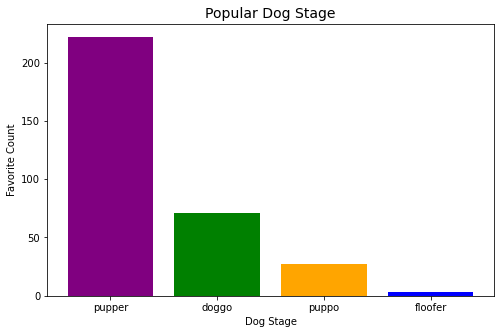

In [76]:
#Ploting bar of dog stage
colors = {'purple', 'orange', 'green', 'blue'}
plt.figure(figsize=(8,5))
plt.xlabel('Dog Stage')
plt.ylabel('Favorite Count')
plt.title("Popular Dog Stage", fontsize=14)
plt.bar(x=twitter_archive_master['dog_stage'].value_counts().index,
        height=twitter_archive_master.dog_stage.value_counts().values, color=colors);

Pupper is the most posted dog stage followered by doggo, puppo and last floofer

**Q5: Which is most favorite dog in 2015, 2016, and 2017?**

In [98]:
#Creating dataset for 2015
twitter_archive_master2015 = twitter_archive_master[(twitter_archive_master['timestamp'] >= '2015-01-01') & (twitter_archive_master['timestamp'] <= '2015-12-31')]
twitter_archive_master2015

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1326  682303737705140231                    NaN                  NaN   
1327  682259524040966145                    NaN                  NaN   
1328  682242692827447297                    NaN                  NaN   
1329  682059653698686977                    NaN                  NaN   
1330  682047327939461121                    NaN                  NaN   
...                  ...                    ...                  ...   
1973  666049248165822465                    NaN                  NaN   
1974  666044226329800704                    NaN                  NaN   
1975  666033412701032449                    NaN                  NaN   
1976  666029285002620928                    NaN                  NaN   
1977  666020888022790149                    NaN                  NaN   

                      timestamp  \
1326  2015-12-30 20:54:22+00:00   
1327  2015-12-30 17:58:40+00:00   
1328  2015-12-30 16:51:48+00:00   
1329  2015-12-30 04:44:28+00:00   
1330  2015-12-30 03:55:29+00:00   
...                         ...   
1973  2015-11-16 00:24:50+00:00   
1974  2015-11-16 00:04:52+00:00   
1975  2015-11-15 23:21:54+00:00   
1976  2015-11-15 23:05:30+00:00   
1977  2015-11-15 22:32:08+00:00   

                                                 source  \
1326  <a href="http://twitter.com/download/iphone" r...   
1327  <a href="http://twitter.com/download/iphone" r...   
1328  <a href="http://twitter.com/download/iphone" r...   
1329  <a href="http://twitter.com/download/iphone" r...   
1330  <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
1973  <a href="http://twitter.com/download/iphone" r...   
1974  <a href="http://twitter.com/download/iphone" r...   
1975  <a href="http://twitter.com/download/iphone" r...   
1976  <a href="http://twitter.com/download/iphone" r...   
1977  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1326  This is Todo. He's screaming because he doesn'...                  NaN   
1327  Meet Jax. He's an Iglesias Hufflepoof. Quite t...                  NaN   
1328  This is Samson. He patrols his waters on the b...                  NaN   
1329  This is Tess. Her main passions are shelves an...                  NaN   
1330  We normally don't rate bears but this one seem...                  NaN   
...                                                 ...                  ...   
1973  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
1974  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
1975  Here is a very happy pup. Big fan of well-main...                  NaN   
1976  This is a western brown Mitsubishi terrier. Up...                  NaN   
1977  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id  retweeted_status_timestamp  \
1326                       NaN                         NaN   
1327                       NaN                         NaN   
1328                       NaN                         NaN   
1329                       NaN                         NaN   
1330                       NaN                         NaN   
...                        ...                         ...   
1973                       NaN                         NaN   
1974                       NaN                         NaN   
1975                       NaN                         NaN   
1976                       NaN                         NaN   
1977                       NaN                         NaN   

                                          expanded_urls  ...  p1_confident  \
1326  https://twitter.com/dog_rates/status/682303737...  ...      0.997659   
1327  https://twitter.com/dog_rates/status/682259524...  ...      0.439670   
1328  https://twitter.com/dog_rates/status/682242692...  ...      0.504983   
132

In [99]:
#Dog which the highest favorite count in 2016
twitter_archive_master2015.loc[twitter_archive_master2015.favorite_count.idxmax()]

tweet_id                                                     676219687039057920
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2015-12-14 01:58:31+00:00
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Kenneth. He's stuck in a bubble. 10/10...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/676219687...
rating_numerator                                                             10
rating_denominator                                                           10
name                                    

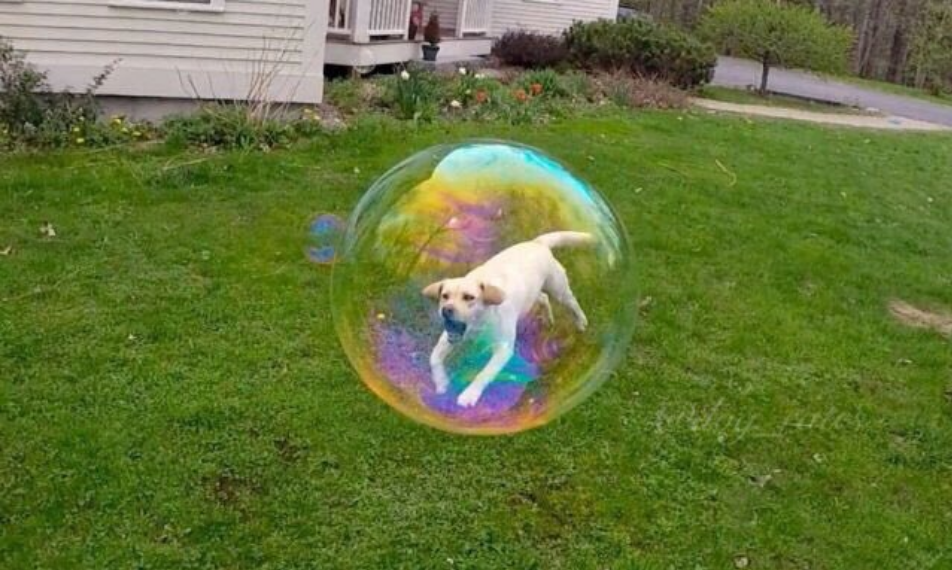

In [100]:
#Creating dataset for 2016
twitter_archive_master2016 = twitter_archive_master[(twitter_archive_master['timestamp'] >= '2016-01-01') & (twitter_archive_master['timestamp'] <= '2016-12-31')]
twitter_archive_master2016

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
353   814638523311648768                    NaN                  NaN   
354   814530161257443328                    NaN                  NaN   
355   814153002265309185                    NaN                  NaN   
356   813910438903693312                    NaN                  NaN   
357   813812741911748608                    NaN                  NaN   
...                  ...                    ...                  ...   
1314  683078886620553216                    NaN                  NaN   
1315  683030066213818368                    NaN                  NaN   
1316  682962037429899265                    NaN                  NaN   
1317  682788441537560576                    NaN                  NaN   
1318  682750546109968385                    NaN                  NaN   

                      timestamp  \
353   2016-12-30 01:05:33+00:00   
354   2016-12-29 17:54:58+00:00   
355   2016-12-28 16:56:16+00:00   
356   2016-12-28 00:52:25+00:00   
357   2016-12-27 18:24:12+00:00   
...                         ...   
1314  2016-01-02 00:14:32+00:00   
1315  2016-01-01 21:00:32+00:00   
1316  2016-01-01 16:30:13+00:00   
1317  2016-01-01 05:00:24+00:00   
1318  2016-01-01 02:29:49+00:00   

                                                 source  \
353   <a href="http://twitter.com/download/iphone" r...   
354   <a href="http://twitter.com/download/iphone" r...   
355   <a href="http://twitter.com/download/iphone" r...   
356   <a href="http://twitter.com/download/iphone" r...   
357   <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
1314  <a href="http://twitter.com/download/iphone" r...   
1315  <a href="http://twitter.com/download/iphone" r...   
1316  <a href="http://twitter.com/download/iphone" r...   
1317  <a href="http://twitter.com/download/iphone" r...   
1318  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
353   This is Olivia. She's a passionate advocate of...                  NaN   
354   This is Alf. Someone just rubbed a balloon on ...                  NaN   
355   This is Oshie. He's ready to party. Bought tha...                  NaN   
356   This is Chubbs. He dug a hole and now he's stu...                  NaN   
357   Meet Gary, Carrie Fisher's dog. Idk what I can...                  NaN   
...                                                 ...                  ...   
1314  Here we see a nifty leaping pupper. Feet look ...                  NaN   
1315  This is Lulu. She's contemplating all her unre...                  NaN   
1316  This is Darrel. He just robbed a 7/11 and is i...                  NaN   
1317  Happy New Year from your fav holiday squad! 🎉 ...                  NaN   
1318  Meet Taco. He's a speckled Garnier Fructis. Lo...                  NaN   

      retweeted_status_user_id  retweeted_status_timestamp  \
353                        NaN                         NaN   
354                        NaN                         NaN   
355                        NaN                         NaN   
356                        NaN                         NaN   
357                        NaN                         NaN   
...                        ...                         ...   
1314                       NaN                         NaN   
1315                       NaN                         NaN   
1316                       NaN                         NaN   
1317                       NaN                         NaN   
1318                       NaN                         NaN   

                                          expanded_urls  ...  p1_confident  \
353   https://twitter.com/dog_rates/status/814638523...  ...      0.650814   
354   https://twitter.com/dog_rates/status/814530161...  ...      0.626913   
355   https://twitter.com/dog_rates/status/814153002...  ...      0.490068   
356

In [105]:
#Dog which the highest favorite count in 2016
twitter_archive_master2016.loc[twitter_archive_master2016.favorite_count.idxmax()]

tweet_id                                                     744234799360020481
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2016-06-18 18:26:18+00:00
source                        <a href="http://twitter.com/download/iphone" r...
text                          Here's a doggo realizing you can stand in a po...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/744234799...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

The image of the dog is not displayed

In [101]:
#Creating dataset for 2017
twitter_archive_master2017 = twitter_archive_master[(twitter_archive_master['timestamp'] >= '2017-01-01') & (twitter_archive_master['timestamp'] <= '2017-12-31')]
twitter_archive_master2017

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0    892420643555336193                    NaN                  NaN   
1    892177421306343426                    NaN                  NaN   
2    891815181378084864                    NaN                  NaN   
3    891689557279858688                    NaN                  NaN   
4    891327558926688256                    NaN                  NaN   
..                  ...                    ...                  ...   
347  815990720817401858                    NaN                  NaN   
348  815966073409433600                    NaN                  NaN   
349  815736392542261248                    NaN                  NaN   
350  815639385530101762                    NaN                  NaN   
351  815390420867969024                    NaN                  NaN   

                     timestamp  \
0    2017-08-01 16:23:56+00:00   
1    2017-08-01 00:17:27+00:00   
2    2017-07-31 00:18:03+00:00   
3    2017-07-30 15:58:51+00:00   
4    2017-07-29 16:00:24+00:00   
..                         ...   
347  2017-01-02 18:38:42+00:00   
348  2017-01-02 17:00:46+00:00   
349  2017-01-02 01:48:06+00:00   
350  2017-01-01 19:22:38+00:00   
351  2017-01-01 02:53:20+00:00   

                                                source  \
0    <a href="http://twitter.com/download/iphone" r...   
1    <a href="http://twitter.com/download/iphone" r...   
2    <a href="http://twitter.com/download/iphone" r...   
3    <a href="http://twitter.com/download/iphone" r...   
4    <a href="http://twitter.com/download/iphone" r...   
..                                                 ...   
347  <a href="http://twitter.com/download/iphone" r...   
348  <a href="http://twitter.com/download/iphone" r...   
349  <a href="http://twitter.com/download/iphone" r...   
350  <a href="http://twitter.com/download/iphone" r...   
351  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
0    This is Phineas. He's a mystical boy. Only eve...                  NaN   
1    This is Tilly. She's just checking pup on you....                  NaN   
2    This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3    This is Darla. She commenced a snooze mid meal...                  NaN   
4    This is Franklin. He would like you to stop ca...                  NaN   
..                                                 ...                  ...   
347  Meet Jack. He's one of the rare doggos that do...                  NaN   
348  Here's a pupper with squeaky hiccups. Please e...                  NaN   
349  This is Akumi. It's his birthday. He received ...                  NaN   
350  This is Titan. His nose is quite chilly. Reque...                  NaN   
351  Happy New Year from the squad! 13/10 for all h...                  NaN   

     retweeted_status_user_id  retweeted_status_timestamp  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   
..                        ...                         ...   
347                       NaN                         NaN   
348                       NaN                         NaN   
349                       NaN                         NaN   
350                       NaN                         NaN   
351                       NaN                         NaN   

                                         expanded_urls  ...  p1_confident  \
0    https://twitter.com/dog_rates/status/892420643...  ...      0.097049   
1    https://twitter.com/dog_rates/status/892177421...  ...      0.323581   
2    https://twitter.com/dog_rates/status/891815181...  ...      0.716012   
3    https://twitter.com/dog_rates/status/891689557...  ...      0

In [102]:
#Dog which the highest favorite count in 2017
twitter_archive_master2017.loc[twitter_archive_master2017.favorite_count.idxmax()]

tweet_id                                                     822872901745569793
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-01-21 18:26:02+00:00
source                        <a href="http://twitter.com/download/iphone" r...
text                          Here's a super supportive puppo participating ...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/822872901...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

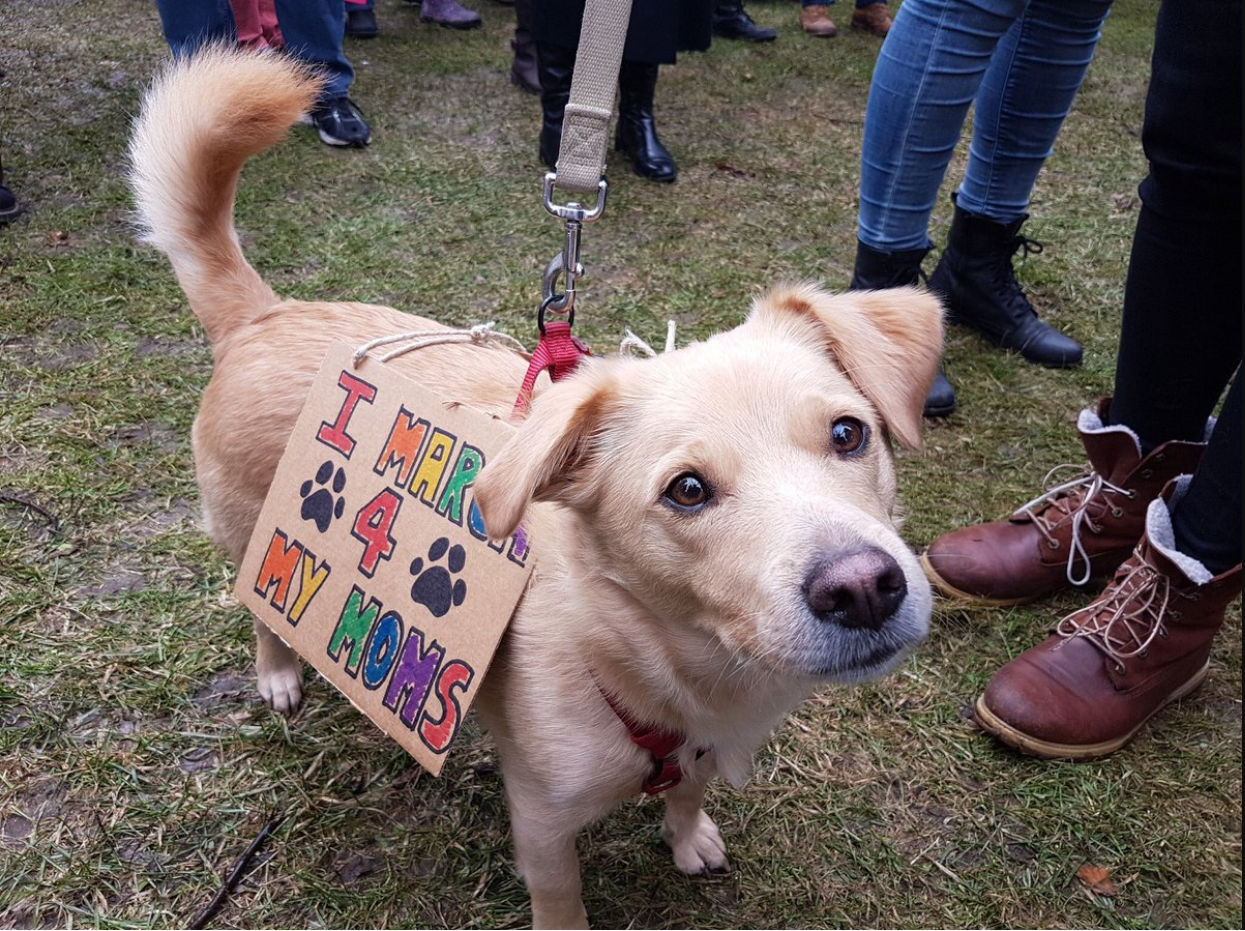